<a href="https://colab.research.google.com/github/joshual777/AD2-Homework1/blob/master/Lab4_SearchingAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejercicio 1.b y 1.c


Formule la tarea como un problema de búsqueda, definiendo el espacio de estados, en el estado inicial, la prueba de objetivo, el conjunto de acciones posibles y el costo de la ruta.

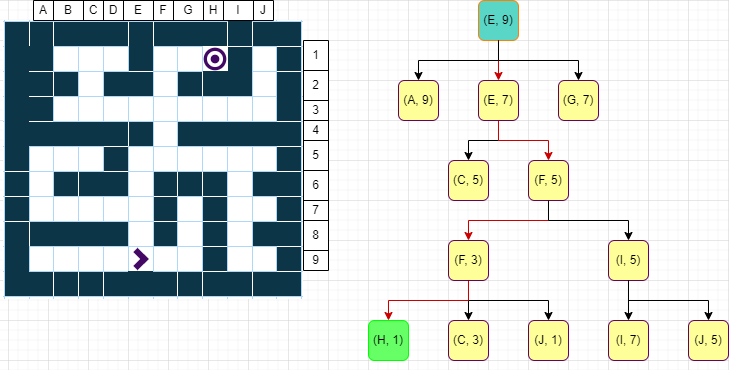

Estado Inicial: (E, 9)

Espacio de Estados:   (E, 9) - (E, 7) - (F,  5) - (F, 3), (H,1) 

Conjunto de Acciones Posibles:  (A, 9) - (G,7) - (E, 7) - (C, 5) - (F,  5) - (F, 3) - (H,1) - (C, 3) - (J -1) -(I, 5) - (I, 7) - (J, 5) 

Prueba Objetivo:  (E, 9) - (E, 8) - (E, 7) - (E, 6) - (E, 5)- (F,  5) - (F, 4) - (F, 3)- (F, 2) - (F, 1) - (G, 1) - (H,1) 

Costo de la Ruta:  12 

 

In [ ]:
ASCII_CODE_OFFSET = 65 #ascii code for 'A'

# matrix representation for the map: 1 means a reachable point, 0 means it's a wall
map_info = [[0,1,1,1,0,1,1,1,0,1],
            [0,0,1,0,0,1,0,0,0,1],
            [0,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,1,0,0,0,0],
            [1,1,1,0,1,1,1,1,1,1],
            [1,0,0,0,1,0,0,0,1,0],
            [1,1,1,1,1,0,1,0,1,1],
            [0,0,0,0,1,0,1,0,1,0],
            [1,1,1,1,1,1,1,0,1,1]]

class MapNode:
  """
  This class represents a node in the map's graph.
  """
  #adjacent nodes
  top_adj = None 
  bottom_adj = None
  right_adj = None
  left_adj = None

  def __init__(self, row : chr, col: int, type_code: int):
    self.is_hall = self.set_is_hall(type_code) # node type (hall or wall)
    self.row = row
    self.col = col
    self.id = self.set_id(row, col)
  
  def __str__(self):
    return self.id

  def set_is_hall(self, code : int) -> bool:
    return bool(code)

  def set_id(self, row: int, col: int) -> str:
    col = chr(col + ASCII_CODE_OFFSET)
    row += 1
    return f'{row}{col}'
  

class MapGraph:
  """
  This class handles the map graph's methods and attributes
  """

  def __init__(self, map_array : list, cost: int):
    self.columns = len(map_array[0])
    self.rows = len(map_array)
    self.nodes_dict = self.set_nodes_dict(map_array) # dictionary to easily reference every node'
    self.set_arcs()
    self.cost = cost

  def set_nodes_dict(self, map_array : list):
    """
    Creates all nodes and adds them to a dictionary for easy access
    """
    nodes_dict = {}
    for i in range(len(map_array)):
      for j in range(len(map_array[0])):
        new_node = MapNode(i,j,map_array[i][j])
        dict_key = j + i * self.columns
        nodes_dict[dict_key] = new_node
    return nodes_dict

  def set_arcs(self):
    "Set the arcs of every node in the graph"
    for i in range(self.rows):
      for j in range(self.columns):
        node = self.get_node(i,j)
        if (i > 0):
          top_adj = self.get_node(i-1, j)
          node.top_adj = top_adj
        if (i < self.rows - 1):
          bottom_adj = self.get_node(i+1,j)
          node.bottom_adj = bottom_adj
        if (j > 0):
          left_adj = self.get_node(i, j-1)
          node.left_adj = left_adj
        if (j < self.columns - 1):
          right_adj = self.get_node(i, j+1)
          node.right_adj = right_adj

  def get_node(self,row: int, col: int) -> MapNode:
    """
    Returns node specified by its row and column
    """
    key = col + row * self.columns
    return self.nodes_dict[key]

  def get_neighbors(self, node: MapNode) -> list:
    neighbors = []
    row = node.row
    col = node.col
    if (node.top_adj != None):
      if (node.top_adj.is_hall):
        neighbors.append(node.top_adj)

    if (node.right_adj != None):
      if (node.right_adj.is_hall):
        neighbors.append(node.right_adj)

    if (node.bottom_adj != None):
      if (node.bottom_adj.is_hall):
        neighbors.append(node.bottom_adj)

    if (node.left_adj != None):
      if (node.left_adj.is_hall):
        neighbors.append(node.left_adj)

    return neighbors


  def parse_row(self, row: int):
    if (1 <= row <= self.rows):
      return row - 1
    raise ValueError("The row index provided is out of range")
  
  def parse_col(self, col: str):
    if (isinstance(col, str) and len(col) == 1):
      col = ord(col) - ASCII_CODE_OFFSET
      if (0 <= col < self.columns):
        return col
      raise ValueError("The row index provided is out of range")
    raise ValueError("The column index provided must be a string with length = 1")

  def get_path(self, came_from : dict, origin: MapNode, target: MapNode) -> list:
      path = []
      current = target
      while current != origin:
        path.append(current)
        current = came_from[current]
      path.append(origin)
      path.reverse()
      return path

  def get_total_cost(self, visited_nodes: dict) -> int:
    return len(visited_nodes) * self.cost

  def breadth_first(self, origin_row: int, origin_col: str, target_row: int, target_col: str) -> dict :
    """
    Breadth-First algorithm implementation
    @return : dict
      {'steps': list(MapNode),
       'nodes_visited': list,
       'nodes_visited_count': int,
       'cost': int}
    """
    origin_row = self.parse_row(origin_row)
    origin_col = self.parse_col(origin_col)
    origin = self.get_node(origin_row, origin_col)

    target_row = self.parse_row(target_row)
    target_col = self.parse_col(target_col)
    target = self.get_node(target_row, target_col)

    frontier = [] #queue to manage frontier nodes
    frontier.append(origin)

    came_from = dict() #path A->B is stored as came_from[B] = A
    came_from[origin] = None

    while len(frontier) > 0:
      current = frontier.pop(0) #get first node from fontier
      if current == target:
        break

      neighbors = self.get_neighbors(current)
      for next in neighbors:
        if next not in came_from:
          frontier.append(next)
          came_from[next] = current

    path = self.get_path(came_from, origin, target)
    cost = self.get_total_cost(came_from)
    nodes_visited = list(came_from.keys())
    nodes_visited_count = len(came_from)
    return {'path': path, 'cost': cost, 'nodes_visited': nodes_visited, 'nodes_visited_count': nodes_visited_count}

  def depth_first(self, origin_row: int, origin_col: str, target_row: int, target_col: str) -> dict :
    """
    Breadth-First algorithm implementation
    @return : dict
      {'steps': list(MapNode),
      'nodes_visited': list,
      'nodes_visited_count': int,
      'cost': int}
    """
    origin_row = self.parse_row(origin_row)
    origin_col = self.parse_col(origin_col)
    origin = self.get_node(origin_row, origin_col)

    target_row = self.parse_row(target_row)
    target_col = self.parse_col(target_col)
    target = self.get_node(target_row, target_col)

    came_from = dict() #path A->B is stored as came_from[B] = A
    came_from[origin] = None

    def depth_first_aux(current: MapNode, target: MapNode, came_from: dict):
      """
      Recursive function to execute depth-first algorithm
      """
      neighbors = self.get_neighbors(current)
      if (current == target or len(neighbors) == 0):
        return
      for next in neighbors:
        if next not in came_from:
          came_from[next] = current
          return depth_first_aux(next, target, came_from)

    depth_first_aux(origin, target, came_from)

    path = self.get_path(came_from, origin, target)
    cost = self.get_total_cost(came_from)
    nodes_visited = list(came_from.keys())
    nodes_visited_count = len(came_from)
    return {'path': path, 'cost': cost, 'nodes_visited': nodes_visited, 'nodes_visited_count': nodes_visited_count}
      
      

#Main
cost = 1
graph = MapGraph(map_info, cost)

# Breadth-First Search
bfs = graph.breadth_first(9,'E', 1, 'H')
print("Breadth First Search")
print("\nPath to target:")
for node in bfs['path'][:-1]:
  print(f'{node} ->', end=' ')
print(bfs['path'][-1])

print(f'\nTotal amount of nodes visited: {bfs["nodes_visited_count"]}')

print(f'\nNodes visited:')
for node in bfs['nodes_visited'][:-1]:
  print(f'{node},', end=' ')
print(bfs['nodes_visited'][-1])

print(f'\nTotal cost ({cost} per node visited): {bfs["cost"]}')

print("-----------------------------------------------------------------------")
# Depth-First Search
dfs = graph.depth_first(9,'E', 1, 'H')
print("\n\nDepth First Search")
print("\nPath to target:")
for node in dfs['path'][:-1]:
  print(f'{node} ->', end=' ')
print(dfs['path'][-1])

print(f'\nTotal amount of nodes visited: {dfs["nodes_visited_count"]}')

print(f'\nNodes visited:')
for node in dfs['nodes_visited'][:-1]:
  print(f'{node},', end=' ')
print(dfs['nodes_visited'][-1])

print(f'\nTotal cost ({cost} per node visited): {dfs["cost"]}')


Breadth First Search

Path to target:
9E -> 8E -> 7E -> 6E -> 5E -> 5F -> 4F -> 3F -> 2F -> 1F -> 1G -> 1H

Total amount of nodes visited: 45

Nodes visited:
9E, 8E, 9F, 9D, 7E, 9G, 9C, 6E, 7D, 8G, 9B, 5E, 7C, 7G, 9A, 5F, 7B, 4F, 5G, 7A, 3F, 5H, 6A, 2F, 3G, 3E, 5I, 5A, 1F, 3H, 3D, 5J, 6I, 5B, 1G, 3I, 3C, 7I, 5C, 1H, 3J, 2C, 3B, 7J, 8I

Total cost (1 per node visited): 45
-----------------------------------------------------------------------


Depth First Search

Path to target:
9E -> 8E -> 7E -> 6E -> 5E -> 5F -> 4F -> 3F -> 2F -> 1F -> 1G -> 1H

Total amount of nodes visited: 12

Nodes visited:
9E, 8E, 7E, 6E, 5E, 5F, 4F, 3F, 2F, 1F, 1G, 1H

Total cost (1 per node visited): 12
